# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\glander\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


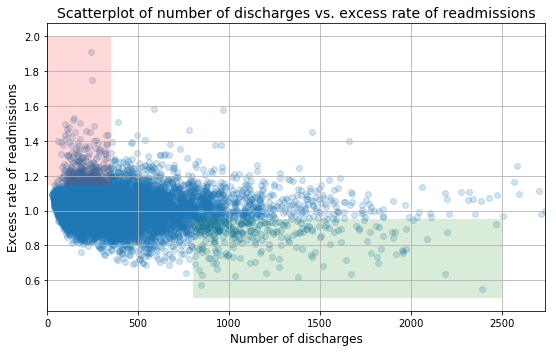

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

## Solution

In [34]:
# First I'll change some column names to make the code less wall-of-texty.

df = clean_hospital_read_df.copy()
df.rename(columns = {'Number of Discharges':'discharges', 'Excess Readmission Ratio':'excess',
                     'Predicted Readmission Rate':'predicted','Expected Readmission Rate':'expected',
                     'Number of Readmissions':'readmissions', 'Measure Name':'measure'}, inplace = True)

#### A. Do you agree with the above analysis and recommendations? Why or why not?

First, it should be noted that nearly a third of the observations in the original dataset were dropped for missing data in the discharge column. Whether this was the ideal method of dealing with the missing data is debatable, but I won't go into that here. Since there were still over 11,000 observations remaining to evaluate, the sample size is easily sufficient for evaluating summary statistics.

In [9]:
(len(hospital_read_df) - len(df))/len(hospital_read_df)

0.3132858837485172

The statistics computed by the analysis are mostly correct - though I got a different % of small hospitals with excess discharge rates (perhaps the preliminary analysis was dropping NaN's in that calculation).

In [45]:
print('Less than 100 discharges, excess mean:', np.mean(df[df.discharges < 100].excess), 'and %',
      len(df[(df.discharges < 100) & (df.excess > 1)])/len(df[df.discharges < 100]), 'greater than 1','\n')
print('Greater than 1000 discharges, excess mean:', np.mean(df[df.discharges > 1000].excess), 'and %',
      len(df[(df.discharges > 1000) & (df.excess > 1)])/len(df[df.discharges > 1000]), 'greater than 1')

Less than 100 discharges, excess mean: 1.0226183501683506 and % 0.5918045705279747 greater than 1 

Greater than 1000 discharges, excess mean: 0.9783354211663071 and % 0.4449244060475162 greater than 1


However there are a number of problems with the analysis.

First, simply looking at a scatterplot of 11,000+ observations, even with alpha set low, does not give a clear understanding of the concentration of points. At this resolution, a cluster of 100 points and 1000 points can look exactly the same, so simply looking at the plotting and saying there are more or less points above 1 in a range on the x-axis is pretty much impossible.

Second, I strongly disagree with the data used by the original analysis. The original problem states:

> "Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions."

Despite this, the analysis is looking at multiple types of readmissions.

In [35]:
df.measure.value_counts()

READM-30-HF-HRRP          2841
READM-30-PN-HRRP          2799
READM-30-COPD-HRRP        2738
READM-30-AMI-HRRP         1807
READM-30-HIP-KNEE-HRRP    1393
Name: measure, dtype: int64

In [191]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>
<!––IGNORE the above, I used this to change jupyter magic html settings so table could be left-aligned––>

According to the [American Hospital Directory](https://www.ahd.com/definitions/qual_collection_periods.php), these values represent.

---
| Code | Definition |
| :--- | --- |
| HF | Heart Failure |
|PN | Pneumonia |
| COPD | Chronic Obstructive Pulmonary Disease |
| AMI | Heart Attack |
| HIP-KNEE-HRRP | Hip/Knee Surgery |  


---
Since the problem is only interested in heart failure, heart attack, and pneumonia - the other codes will need to be dropped from the dataframe.

In [49]:
# dropping rows that don't contain the proper measure
codes = ['READM-30-HF-HRRP', 'READM-30-PN-HRRP', 'READM-30-AMI-HRRP']
df = df[df.measure.isin(codes)].copy()

Another problem with the study, is that the same hospitals are being used as seperate observations for each type of treatment the hospital reported data for.

In [50]:
df['Hospital Name'].nunique()

2837

In [51]:
df.sort_values(by = 'Hospital Name').head(5)

,Hospital Name,Provider Number,State,measure,discharges,Footnote,excess,predicted,expected,readmissions,Start Date,End Date
4781,ABBEVILLE GENERAL HOSPITAL,190034,LA,READM-30-PN-HRRP,163,NaN,1.0284,18.0,17.5,31.0,07/01/2010,06/30/2013
963,ABBEVILLE GENERAL HOSPITAL,190034,LA,READM-30-HF-HRRP,206,NaN,1.1315,25.1,22.2,59.0,07/01/2010,06/30/2013
12273,ABBOTT NORTHWESTERN HOSPITAL,240057,MN,READM-30-HF-HRRP,750,NaN,0.9043,19.8,21.9,143.0,07/01/2010,06/30/2013
12962,ABBOTT NORTHWESTERN HOSPITAL,240057,MN,READM-30-AMI-HRRP,584,NaN,0.8712,12.8,14.7,68.0,07/01/2010,06/30/2013
8622,ABBOTT NORTHWESTERN HOSPITAL,240057,MN,READM-30-PN-HRRP,294,NaN,0.9741,16.9,17.3,48.0,07/01/2010,06/30/2013


I'll solve for this by grouping the data by hospital name and aggregating with a sum for readmissions and discharges while using an average (weighted by discharges) for excess, predicted, and expected.

In [59]:
# I'll create a function for weighted average and use partial to pass all but the first argument
# to a function variable so it can be used in the agg method of a groupby.

import functools

def weighted_avg(col, df, weight):
    w = df.loc[col.index][weight]
    if w.sum() > 0:
        return (col * w).sum() / w.sum()
    else:
        return (col * w).sum()

w_avg = functools.partial(weighted_avg, df=df, weight='discharges')
cols = ['Hospital Name', 'discharges', 'excess', 'predicted', 'expected', 'readmissions']

grouped_df = df[cols].groupby('Hospital Name').agg({'discharges': np.sum, 'readmissions': np.sum,
                                       'excess': w_avg, 'predicted': w_avg, 'expected': w_avg})

In [60]:
grouped_df.head()

,discharges,readmissions,excess,predicted,expected
Hospital Name,,,,,
ABBEVILLE GENERAL HOSPITAL,369,90.0,1.085957,21.963686,20.123848
ABBOTT NORTHWESTERN HOSPITAL,1628,259.0,0.905031,16.765233,18.486486
ABILENE REGIONAL MEDICAL CENTER,705,108.0,0.936988,16.732199,18.029504
ABINGTON MEMORIAL HOSPITAL,2547,491.0,0.999921,19.191402,19.205693
ACADIA GENERAL HOSPITAL,515,87.0,0.960618,17.566990,18.110680


In [63]:
grouped_df.describe()

,discharges,readmissions,excess,predicted,expected
count,2837.000000,2799.000000,2837.000000,2837.000000,2837.000000
mean,902.007755,180.752412,0.991396,19.328630,19.206057
std,834.685809,168.554536,0.132590,3.237377,2.742985
min,0.000000,11.000000,0.000000,0.000000,0.000000
25%,313.000000,62.500000,0.960705,17.943973,18.481081
50%,662.000000,133.000000,1.001635,19.424777,19.420648
75%,1222.000000,243.000000,1.045811,21.022913,20.391979
max,7373.000000,1575.000000,1.312933,28.761252,26.100000


Now I'll look at the intitial graph on the cleaned data.

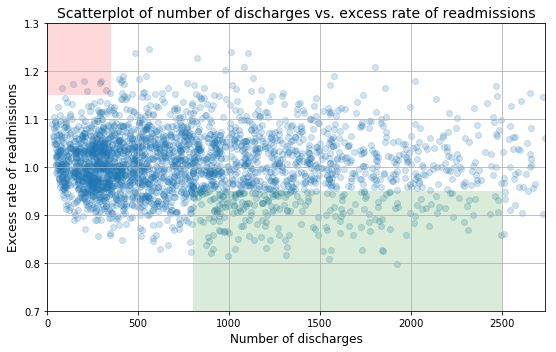

In [68]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(grouped_df.discharges, grouped_df.excess ,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_ylim([.7,1.3])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

Now that the data has been properly organized and grouped, there does not appear to be any relationship between the number of discharges and the excess rate of readmissions.

From the figures below, it's pretty clear what's going on. The dropped measures (COPD and HIP/KNEE) had pretty low discharge numbers, and proportionately lower readmission rates. These observations were causing the data to look like small hospitals had lower readmission levels than large hospitals, when in fact no such pattern ever existed.

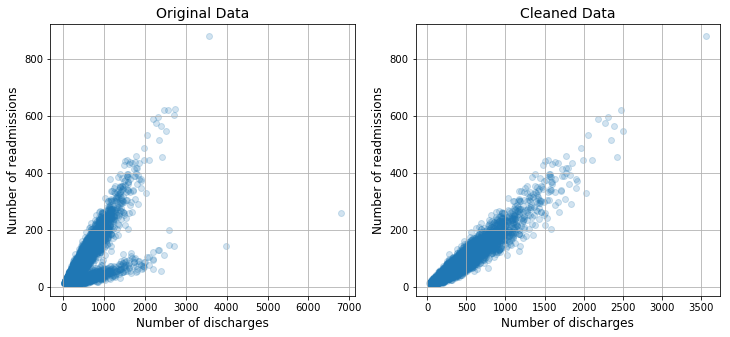

In [90]:
fig, (ay,ax) = plt.subplots(1,2, figsize=(12,5))

ax.scatter(df.discharges,df.readmissions, alpha = .2)
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Cleaned Data', fontsize=14)
ax.grid(True)

ay.scatter(clean_hospital_read_df['Number of Discharges'],
           clean_hospital_read_df['Number of Readmissions'], alpha = .2)
ay.set_xlabel('Number of discharges', fontsize=12)
ay.set_ylabel('Number of readmissions', fontsize=12)
ay.grid(True)
ay.set_title('Original Data', fontsize = 14)

For all of the aforementioned reasons and charts, I reject the original analysis.

Now that all the data transformations and visual EDA is complete, I can finally get to solving the main problems of this assessment.

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

- **1. Setup an appropriate hypothesis test.**

The original analysis argued that there was a significant correlation between # of discharges and excess rates of readmissions, and looked at two groups of hospitals - discharges below 100 and discharges above 100.

So I will perform a two sample t-test. I don't know how the hospitals in this dataset were selected, so I do not know if I can assume equal variance to the population. For that reason I'll perform a standard 2-sample t-test as well as a Welch's t-test.

Because the original analysis argued that small hospitals had higher excess readmission rates than large hospitals, I'll make these 1-tailed tests.

Additionally, because I have no idea where the initial predicated and expected values for each hospital-measure came from, I'd like to also look at the number of readmissions per discharge at large and small hospitals. I'll perform the same tests on this derived value.

Formally stated, the hypotheses are as follows:

$H_{0}: \mu_{large} \geq \mu_{small}$  
$H_{A}: \mu_{large} < \mu_{small}$

Where $\mu$ refers to the mean for excess rate of readmission in the first test, and mean readmissions per discharge in the second test.

**NOTE:** I will exlude hospitals with 0 discharges, as those appear to be erroneous data.

- **2. Compute and report the observed significance value (or p-value).**

In [147]:
from scipy.stats import ttest_ind

low_discharge = grouped_df[(grouped_df.discharges < 100) & (grouped_df.discharges > 0)].excess
high_discharge = grouped_df[grouped_df.discharges > 1000].excess

print('-- Excess Ratio --\n2 sample t-test assuming equal population variance:\n', ttest_ind(low_discharge, high_discharge))
print('\n2 sample Welch\'s t-test not assuming equal population variance:\n',
      ttest_ind(low_discharge, high_discharge, equal_var = False))

grouped_df['readmit_per_discharge'] = grouped_df.readmissions / grouped_df.discharges
low_r2d = grouped_df[(grouped_df.discharges < 100) & (grouped_df.discharges > 0)].readmit_per_discharge
high_r2d = grouped_df[grouped_df.discharges > 1000].readmit_per_discharge

print('\n-- Readmissions per Discharge --\n2 sample t-test assuming equal population variance:\n', ttest_ind(low_r2d, high_r2d))
print('\n2 sample Welch\'s t-test not assuming equal population variance:\n',
      ttest_ind(low_r2d, high_r2d, equal_var = False))

-- Excess Ratio --
2 sample t-test assuming equal population variance:
 Ttest_indResult(statistic=2.931481153191136, pvalue=0.0034466969593074685)

2 sample Welch's t-test not assuming equal population variance:
 Ttest_indResult(statistic=4.0510961749204126, pvalue=7.4306279855115064e-05)

-- Readmissions per Discharge --
2 sample t-test assuming equal population variance:
 Ttest_indResult(statistic=8.1839779571152942, pvalue=7.8982674359279861e-16)

2 sample Welch's t-test not assuming equal population variance:
 Ttest_indResult(statistic=4.5029135712349344, pvalue=1.5604288692914143e-05)


In [214]:
from statsmodels.stats.power import tt_ind_solve_power

effects = [('Standard t-test on Excess Rate', 2.931), ('Welch\'s t-test on Excess Rate', 4.051),
 ('Standard t-test on Readmits per Discharge', 8.184), ('Welch\'s t-test on Readmits per Discharge', 4.503)]

for effect in effects:
    p = tt_ind_solve_power(effect_size = 1,alpha=0.01,nobs1=935,power=None,ratio=935/116,alternative='larger')
    print('For {} the power is: {}\n'.format(effect[0],p))

For Standard t-test on Excess Rate the power is: 1.0

For Welch's t-test on Excess Rate the power is: 1.0

For Standard t-test on Readmits per Discharge the power is: 1.0

For Welch's t-test on Readmits per Discharge the power is: 1.0



Since python's statistical tests all assume two tailed tests and I'm doing 1-tailed, I needed to divide each of the above by 2. The values are as follows:

| Variable | Population Variance | $p_{value}$ |
| :--- | --- | --- |
| Excess Rate of Readmission | Assumed Equal | 0.0017 |
|  | Not Assumed Equal | 3.7e-6 |
| Readmissions per Discharge | Assumed Equal |3.95e-17 |
|  | Not Assumed Equal | 7.5e-6 |

- **3. Report statistical significance for $\alpha = .01$.**

As $p_{value} < \alpha$ for every possible test, I reject the null hypothesis in favor of the alternative. Small hospitals have higher rates of readmission than large ones on both indicator variables tested.

- **4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

Statistical significance has been demonstrated above. It is the claim that the size and values of the two samples are sufficient to say that their relationship is representative of the relationship between their populations at the chosen $\alpha$. Stated more colloquially, it is a way of saying the difference in means between the two samples is mathematically believable.

Practical significance is less clearly defined. It refers to how useful the same relationship is to a real-world application. Basically, it's contextual. For instance, say you're testing the mortality rate of an existing drug and a replacement drug -- The mean mortality rate of the existing drug is 1e-9, and the replacement is 1e-10. If the study is on a large enough sample size, you would conclude find statistical signficance in the replacement drug having a lower mortality rate. However the rates are so low to begin with, it may or may not make **practical** sense to manufacture a new drug where 1 in 10 billion patients die as opposed to 1 in a billion. If there's no difference in cost, side-effects or efficacy, then the result is practically signficant. If however the efficacy of the drug halves, the result is not practically signficant - making a harmless drug less effective and more harmless is not a worthwhile endeavor. If the mortality rate went from 1e-5 to 1.1e-5, but the cost of production increases, practical signficance is subject to the priorities of the manufacturer.

Okay, that was a long digression. As for these results, I think practical significance is better interpretted by the client. I'm not trying to get out of answering the question, I just don't know as much as the client about the subject matter to give a good answer.

Yes, smaller hospitals have higher readmission rates than larger ones, but I don't know if I can make the same recommendations to CMS (requiring smaller hostpitals to upgrade resource allocation, facilities, and care as well as providing incentives for smaller hospitals to merge/consolidate). Many small hospitals are small because they operate in less densely populated areas. Were these hospitals to consolidate, patients would have to travel greater distances for care. Especially considering this study is looking at readmission for heart attacks, the greater travel time could result in a higher fatality rate (silver-lining: Lower readmissions!).

Similar hesitation should be given to the recommendation that small hospitals upgrade their facilities/resources. These small hospitals likely don't receive the volume of patients necessary to upgrade their equipment or staff more caregivers. Requiring these hospitals to make upgrades would sizably increase the cost of care for patients - and if the impetus of this study was to find ways of lowering readmissions to lower medicare costs, this might be an ineffective way of doing so. The difference in the two rates is statistically significant, yes. But is it a large enough difference to justify the recommendations provided? That really depends on what the client prioritizes.

- **5. Look at the scatterplot above.**
    * **What are the advantages and disadvantages of using this plot to convey information?** 
    * **Construct another plot that conveys the same information in a more direct manner.**

I've already gone through the shortcomings of the initial chart. The advantage of it is an easy way to visualize the relationship between two variables and where those points lie relative to 'target' and 'danger' ranges.

There are two ways to adapt the previous plot. One is to reuse it with variables that display a more visually interprettable relationship. I do this below with the derived readmissions per discharge variable.

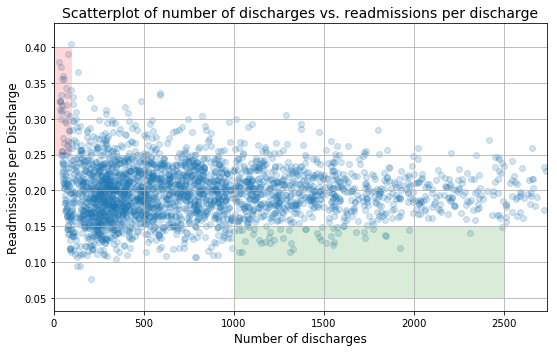

In [215]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(grouped_df.discharges, grouped_df.readmit_per_discharge ,alpha=0.2)

ax.fill_between([0,100], .25, .4, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([1000,2500], .05, .15, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
# ax.set_ylim([.7,1.3])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Readmissions per Discharge', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. readmissions per discharge', fontsize=14)

ax.grid(True)
fig.tight_layout()

The other way of conveying the information in a more direct manner is through an overlaid histogram of the two different discharge groups. This shows the distribution of each group and how those distributions relate to each other. I have done this below for small and large hospitals.

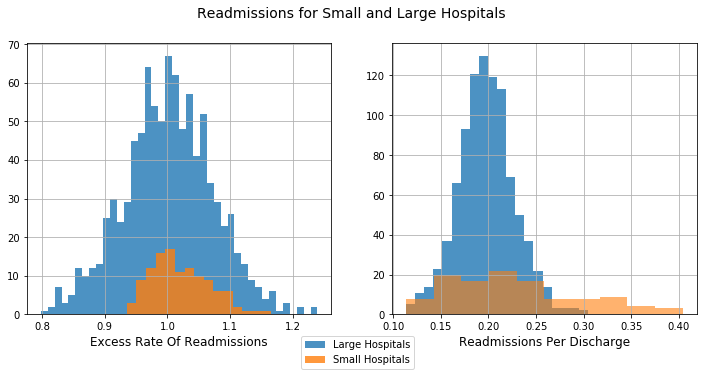

In [182]:
fig, (ax,ay) = plt.subplots(1,2, figsize=(12,5))

ax.hist(high_discharge, bins = 40, alpha = .8, label = 'Large Hospitals')
ax.hist(low_discharge, bins = 15, alpha = .8, label = 'Small Hospitals')

ay.hist(high_r2d, bins = 20, alpha = .8)
ay.hist(low_r2d, bins = 10, alpha = .6)

ax.legend(loc = (.9,-.2))
fig.suptitle('Readmissions for Small and Large Hospitals', fontsize = 14)
ax.set_xlabel('Excess Rate Of Readmissions', fontsize=12)
ay.set_xlabel('Readmissions Per Discharge', fontsize=12)
ax.grid(True)
ay.grid(True)

Here, unlike in the original plot, it is very clear to see that there is a positive skew in the distribution of readmissions for small hospitals that is not present in large hospitals. Unlike in the scatterplots, it is easy to see how many points are falling into each zone. Simply put, it shows not only the problem, but the scale of the problem.